In [1]:
from __future__ import print_function, absolute_import, division

import os
import sys
from numpy import pi
import matplotlib.pyplot as plt

# Use non-interactive backend in matplotlib
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
ambient_pressure=99000
ambient_temperature=295.15
H2_pressure=1090000
H2_temperature=295.15
orifice_diameter=0.0015
orifice_discharge_coefficient=1
angle_of_jet=pi/2
directory=os.getcwd()
Xlims=[ -2.5,2.5 ]
Ylims=[ 0,10 ]
plot_title=" "
contours=[ 0.04 ]

In [9]:
from hyram.phys import Gas, Orifice, Jet, AbelNoble

nns = ['YuceilOtugen' , 'EwanMoodie'  , 'Birch', 'Birch2', 'Molkov', 'HarstadBellan'] 
ambient = Gas(AbelNoble(b = 0, MW = 28.97), T = ambient_temperature, P = ambient_pressure)
source_gas = Gas(AbelNoble(), T = H2_temperature, P = H2_pressure)
orifice = Orifice(orifice_diameter, orifice_discharge_coefficient)
plumes = {}
for nn in nns:
    plumes[nn] = Jet(source_gas, orifice, ambient, theta0=angle_of_jet, nnmodel=nn)

solving for the plume... done.
solving for the plume... done.
solving for the plume... done.
solving for the plume... done.
solving for the plume... done.
4576.876763970132 98999.99999999987 0.017956637285073608 0.08439266787171557 61.79320310303446 284.25293096905267 2595.5595808411867 560.8873252726556
solving for the plume... done.


In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


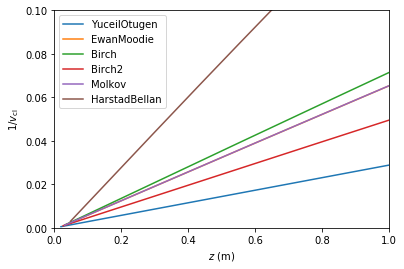

In [11]:
for nn in nns:
    pl = plumes[nn]
    plt.plot(pl.y, 1./pl.V_cl, label = nn);
legend();
xlabel('$z$ (m)');
ylabel(r'$1/v_{\rm cl}$');
xlim(0, 1);
ylim(0, .1);
savefig('inverse velocity.png')

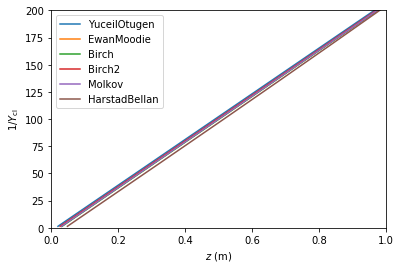

In [12]:
for nn in nns:
    pl = plumes[nn]
    plt.plot(pl.y, 1./pl.Y_cl, label = nn);
legend();
xlabel('$z$ (m)');
ylabel(r'$1/Y_{\rm cl}$');
xlim(0, 1);
ylim(0, 200);
savefig('inverse mass fraction.png')

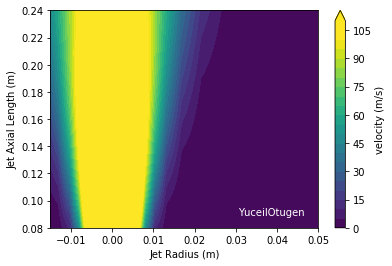

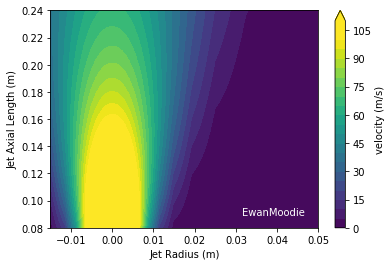

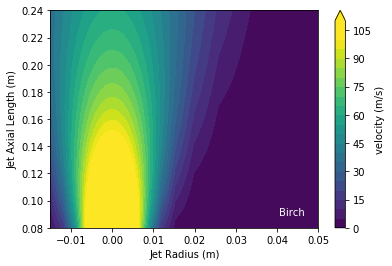

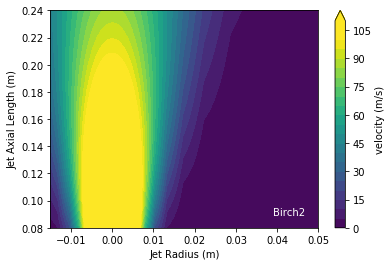

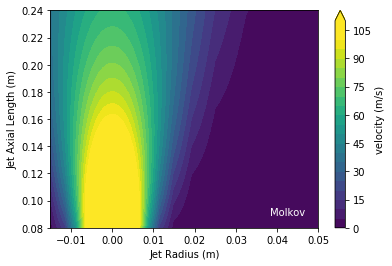

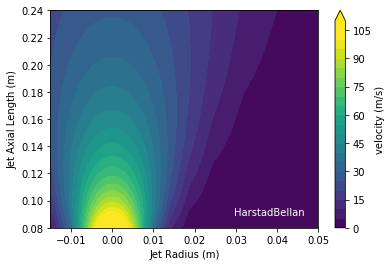

In [14]:
for nn in nns:
    pl = plumes[nn]
    x, y, X, Y, v = pl._contourdata(True)
    contourf(x,y,v,vmin = 0, vmax = 100, levels = range(0, 111, 5), extend = 'max')
    xlim(-.015, .05);
    ylim(.08, .24);
    colorbar(label = 'velocity (m/s)');
    annotate(nn, (.95, .05), ha = 'right', va = 'bottom', color = 'w', 
             xycoords = 'axes fraction')
    xlabel('Jet Radius (m)');
    ylabel('Jet Axial Length (m)')
    savefig(nn + '_v.png')
    figure()

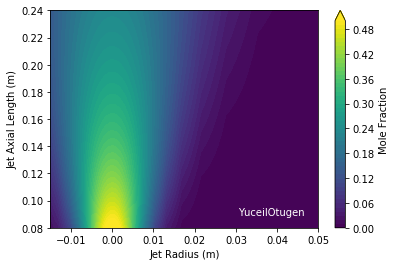

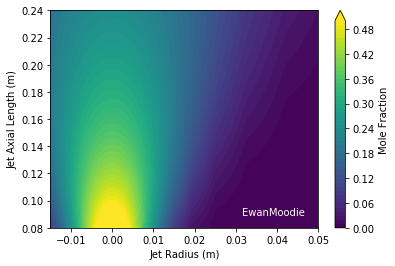

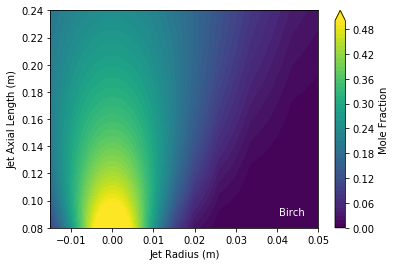

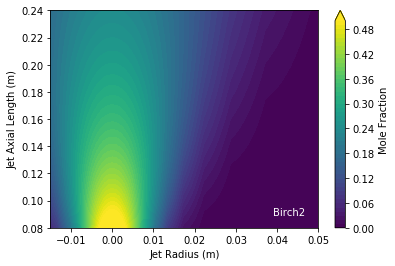

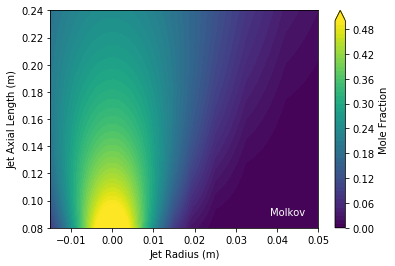

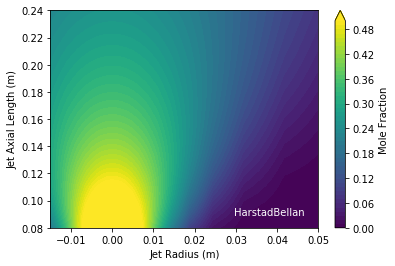

In [15]:
for nn in nns:
    pl = plumes[nn]
    x, y, X, Y, v = pl._contourdata(True)
    contourf(x,y,X,vmin = 0, vmax = .5, levels = arange(0, .51, .01), extend = 'max')
    xlim(-.015, .05);
    ylim(.08, .24);
    colorbar(label = 'Mole Fraction');
    annotate(nn, (.95, .05), ha = 'right', va = 'bottom', color = 'w', 
             xycoords = 'axes fraction')
    xlabel('Jet Radius (m)');
    ylabel('Jet Axial Length (m)')
    savefig(nn + '_X.png')
    figure()